# importing some important libreries

In [1]:
import pandas as pd                              # for data processing
import numpy as np                               # for linear algebra
import matplotlib.pyplot as plt                # for data vizualization

# Importing Datasets

In [2]:
dt = pd.read_csv("train.csv")
dt_test = pd.read_csv("test_titenic.csv")

In [3]:
dt.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Col to drop

In [5]:
col_to_drop = ['PassengerId','Name','Ticket','Cabin','Embarked']

In [6]:
data_clean = dt.drop(col_to_drop, axis = 1)
data_clean_test = dt_test.drop(col_to_drop, axis = 1)
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


# Encode Sex column

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
le = LabelEncoder()

In [9]:
data_clean["Sex"] = le.fit_transform(data_clean['Sex'])
data_clean_test["Sex"] = le.fit_transform(data_clean_test['Sex'])
data_clean.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


In [10]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int32(1), int64(4)
memory usage: 45.4 KB


# Tackle out null value

In [11]:
data_clean["Age"] = data_clean.fillna(data_clean["Age"].mean())['Age']
data_clean_test["Age"] = data_clean_test.fillna(data_clean["Age"].mean())['Age']

In [12]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int32(1), int64(4)
memory usage: 45.4 KB


In [13]:
data_clean_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    int64  
 1   Sex     418 non-null    int32  
 2   Age     418 non-null    float64
 3   SibSp   418 non-null    int64  
 4   Parch   418 non-null    int64  
 5   Fare    417 non-null    float64
dtypes: float64(2), int32(1), int64(3)
memory usage: 18.1 KB


In [14]:
data_clean_test["Fare"] = data_clean_test.fillna(data_clean_test["Fare"].mean())["Fare"]

In [15]:
data_clean_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    int64  
 1   Sex     418 non-null    int32  
 2   Age     418 non-null    float64
 3   SibSp   418 non-null    int64  
 4   Parch   418 non-null    int64  
 5   Fare    418 non-null    float64
dtypes: float64(2), int32(1), int64(3)
memory usage: 18.1 KB


# Visualization 

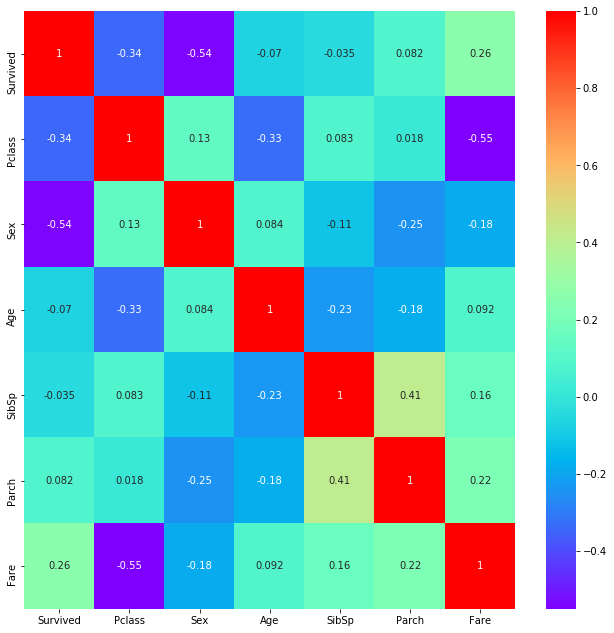

In [16]:
import seaborn as sns
data_clean.corr()
plt.figure(figsize=(11,11))
sns.heatmap(data_clean.corr(),cmap='rainbow',annot=True)
plt.show()

# Spliting of datasets

In [17]:
input_column = ['Pclass',"Sex","Age","SibSp","Parch","Fare"]
output_column = ["Survived"]

In [18]:
X_train = data_clean[input_column]
Y_train = data_clean[output_column]
X_test = data_clean_test

In [19]:
X_test.shape

(418, 6)

In [20]:
X_train.shape

(891, 6)

In [21]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,34.5,0,0,7.8292
1,3,0,47.0,1,0,7.0000
2,2,1,62.0,0,0,9.6875
3,3,1,27.0,0,0,8.6625
4,3,0,22.0,1,1,12.2875


In [22]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,22.0,1,0,7.2500
1,1,0,38.0,1,0,71.2833
2,3,0,26.0,0,0,7.9250
3,1,0,35.0,1,0,53.1000
4,3,1,35.0,0,0,8.0500


# Modelling and Training

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

dtc = DecisionTreeClassifier(max_depth=4,criterion='entropy')
rfc = RandomForestClassifier(max_depth=5,criterion='entropy',n_estimators=16)

In [24]:
dtc.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [25]:
dtc.score(X_train,Y_train)

0.8406285072951739

In [26]:
rfc.fit(X_train,Y_train)

C:\Users\hp\Anaconda3\new_conda\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=16, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [27]:
rfc.score(X_train,Y_train)

0.8529741863075196

In [28]:
y_pred = dtc.predict(X_test)
y_pred1 = rfc.predict(X_test)

In [29]:
gender_submission = pd.read_csv("gender_submission.csv")

In [30]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [31]:
Y_true = gender_submission["Survived"]

In [32]:
from sklearn.metrics import accuracy_score
Accuracy_of_DTC_Model = accuracy_score(Y_true, y_pred)

In [33]:
Accuracy_of_RFC_Model = accuracy_score(Y_true, y_pred1)

# Final Accuracy of Two Model on test dataset

In [34]:
Accuracy = {"DTC":Accuracy_of_DTC_Model,"RFC":Accuracy_of_RFC_Model}

In [35]:
Accuracy

{'DTC': 0.9425837320574163, 'RFC': 0.9354066985645934}

# Creating Submition File in Kaggle

In [36]:
Passenger_Id = gender_submission["PassengerId"]

In [38]:
gender_submission_1 = {"PassengerId":Passenger_Id,"Survived":y_pred}

In [39]:
gender_submission_2 = pd.DataFrame(gender_submission_1)

In [47]:
gender_submission_2.to_csv("Titenic_gender_submission_AKASH.csv")

In [48]:
gender_submission_2.shape

(418, 2)

In [49]:
gender_submission_2.to_csv("gender_submission.csv")